In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob

import matplotlib.pyplot as plt

## Reading data

In [2]:
PATH = "../dados/nhanes/kaggle-2013-2014/"
os.chdir(PATH)
file_paths = glob.glob('*.{}'.format('csv'))
file_paths

['demographic.csv',
 'diet.csv',
 'examination.csv',
 'labs.csv',
 'medications.csv',
 'questionnaire.csv']

In [3]:
df = pd.read_csv(file_paths[0])
for path in file_paths[1:]:
    print("Reading", path)
    df = df.merge(pd.read_csv(path, encoding="ISO-8859-1"), on="SEQN", how="inner")
df

Reading diet.csv
Reading examination.csv
Reading labs.csv
Reading medications.csv
Reading questionnaire.csv


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
2,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
3,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
4,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19575,83727,8,2,1,26,NaN,2,2,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,150.0,26.0,NaN,NaN,NaN
19576,83728,8,2,2,2,24.0,1,1,2.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19577,83729,8,2,2,42,NaN,4,4,2.0,NaN,...,NaN,NaN,155.0,135.0,NaN,195.0,42.0,NaN,NaN,NaN
19578,83730,8,2,1,7,NaN,2,2,1.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning data

In [4]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

### Remove columns with no variability

In [5]:
def clean_same_value_columns(df):
    print("Cleaning zero variance columns")
    print("Columns before:", df.shape)
    to_drop = []
    for col in df.columns:
        # print(col)
        try:
            if df[col].std() == 0: to_drop.append(col)
        except:
            to_drop.append(col)
    df = df.drop(columns=to_drop)
    print("Columns after:", df.shape)
    print(f"{len(to_drop)} columns eliminated for having the only one value")
    return df

df = clean_same_value_columns(df)

Columns before: (19580, 1824)

Columns after: (19580, 1571)
253 columns eliminated for having the only one value


### Remove columns with more than 70% nulls

Text(0.5, 1.0, 'Percentage of null values')

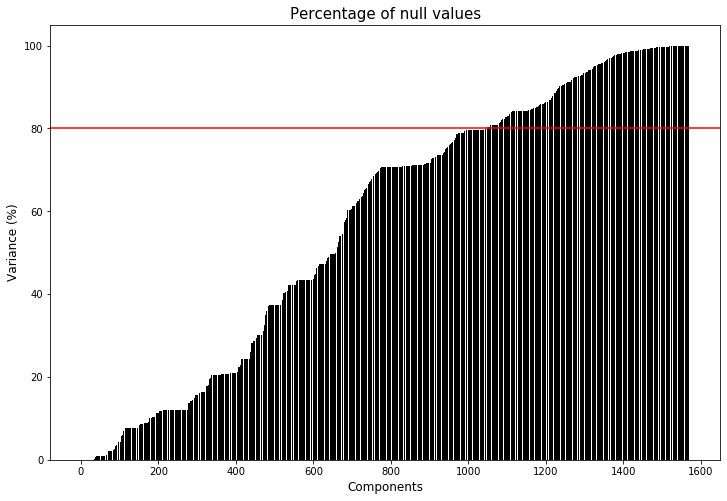

In [6]:
df_null = pd.DataFrame({'percentage': 100 * df.isnull().sum() / df.shape[0]})

plt.figure(figsize=(12, 8))
plt.axhline(80, color="red")
plt.bar(x=list(range(df_null.shape[0])), height=df_null.sort_values(by="percentage")["percentage"], color='black')
plt.xlabel('Components', fontsize=12)
plt.ylabel('Variance (%)', fontsize=12)
plt.title('Percentage of null values',fontsize=15)

In [7]:
def clean_nulls(df, percent=0.8):
    print("Cleaning nulls")
    print("Before:", df.shape)
    df_null = pd.DataFrame({'percentage': df.isnull().sum() / df.shape[0]})
    df_high = df_null[df_null['percentage'] > percent]
    df.drop(list(df_high.index), axis=1, inplace=True)
    print("After:", df.shape)
    print(f"Dropped {df_high.shape[0]} values for having more than {100*percent} null values")
    return df


df = clean_nulls(df, percent=.8)
df

Before: (19580, 1571)
After: (19580, 1045)
Dropped 526 values for having more than 80.0 null values


,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMDBORN4,DMDCITZN,...,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD110,WHD120,WHD130,WHD140,WHQ150
0,73557,1,69,4,4,1.0,NaN,1.0,1,1.0,...,180.0,3.0,3.0,210.0,NaN,270.0,200.0,69.0,270.0,62.0
1,73557,1,69,4,4,1.0,NaN,1.0,1,1.0,...,180.0,3.0,3.0,210.0,NaN,270.0,200.0,69.0,270.0,62.0
2,73558,1,54,3,3,1.0,NaN,2.0,1,1.0,...,200.0,3.0,3.0,160.0,2.0,240.0,250.0,72.0,250.0,25.0
3,73558,1,54,3,3,1.0,NaN,2.0,1,1.0,...,200.0,3.0,3.0,160.0,2.0,240.0,250.0,72.0,250.0,25.0
4,73558,1,54,3,3,1.0,NaN,2.0,1,1.0,...,200.0,3.0,3.0,160.0,2.0,240.0,250.0,72.0,250.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19575,83727,1,26,2,2,2.0,NaN,2.0,1,1.0,...,150.0,3.0,3.0,150.0,2.0,NaN,NaN,NaN,150.0,26.0
19576,83728,2,2,1,1,2.0,24.0,NaN,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19577,83729,2,42,4,4,2.0,NaN,2.0,2,1.0,...,195.0,1.0,2.0,185.0,1.0,155.0,135.0,NaN,195.0,42.0
19578,83730,1,7,2,2,1.0,84.0,NaN,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Seeing the data

In [8]:
df.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMDBORN4,DMDCITZN,...,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD110,WHD120,WHD130,WHD140,WHQ150
count,19580.000000,19580.000000,19580.000000,19580.000000,19580.000000,19580.000000,4770.000000,15336.000000,19580.000000,19574.000000,...,15449.000000,15568.000000,15568.000000,15425.000000,13276.000000,12725.000000,13834.000000,10276.000000,15119.000000,14910.000000
mean,78544.159704,1.534627,45.443565,3.106793,3.260572,1.514454,109.730818,1.868871,1.200919,1.075355,...,247.110946,1.796441,2.221030,336.489335,1.633851,400.575246,572.003108,331.933048,332.331636,791.196378
std,2935.456571,0.498812,25.559836,1.144535,1.447386,0.499804,69.059932,0.340438,1.381061,0.334181,...,770.244635,0.980700,0.606195,1192.000964,0.515606,1444.256987,1982.816705,1592.437902,1095.520652,8592.243985
min,73557.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,75.000000,1.000000,1.000000,75.000000,1.000000,75.000000,55.000000,50.000000,85.000000,10.000000
25%,75978.000000,1.000000,20.000000,3.000000,3.000000,1.000000,49.000000,2.000000,1.000000,1.000000,...,150.000000,1.000000,2.000000,148.000000,1.000000,145.000000,125.000000,63.000000,165.000000,33.000000
50%,78503.000000,2.000000,52.000000,3.000000,3.000000,2.000000,107.000000,2.000000,1.000000,1.000000,...,175.000000,1.000000,2.000000,175.000000,2.000000,173.000000,145.000000,66.000000,196.000000,48.000000
75%,81063.000000,2.000000,67.000000,4.000000,4.000000,2.000000,169.000000,2.000000,1.000000,1.000000,...,212.000000,3.000000,3.000000,218.000000,2.000000,210.000000,180.000000,70.000000,240.000000,61.000000
max,83731.000000,2.000000,80.000000,5.000000,7.000000,2.000000,239.000000,7.000000,77.000000,9.000000,...,9999.000000,9.000000,9.000000,9999.000000,9.000000,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000


In [10]:
cor = df.corr()
cor

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMDBORN4,DMDCITZN,...,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD110,WHD120,WHD130,WHD140,WHQ150
SEQN,1.000000,-0.007818,-0.005094,0.018624,0.017584,0.004912,0.026416,0.008978,-0.012725,0.022746,...,-0.005083,0.030020,0.000542,-0.028290,-0.005737,-0.016211,-0.011828,-0.014196,-0.008957,0.008486
RIAGENDR,-0.007818,1.000000,0.045940,-0.010638,-0.008466,0.008338,0.031260,0.381925,0.008213,0.003213,...,0.008523,-0.123983,-0.039295,0.010214,-0.108737,0.038346,-0.006893,0.018853,0.008229,-0.018926
RIDAGEYR,-0.005094,0.045940,1.000000,0.028389,-0.012529,0.036886,0.998737,-0.241857,0.045803,0.009536,...,-0.008509,-0.018400,0.096818,0.005677,0.110011,0.005809,0.022079,0.006238,0.037386,0.065531
RIDRETH1,0.018624,-0.010638,0.028389,1.000000,0.966514,-0.032832,-0.001405,-0.003895,-0.026209,-0.111125,...,-0.007555,0.083948,0.007978,0.001800,0.038793,-0.045043,-0.025778,0.007316,0.008251,-0.004541
RIDRETH3,0.017584,-0.008466,-0.012529,0.966514,1.000000,-0.027800,-0.006020,0.021733,-0.004320,-0.064835,...,0.000921,0.086338,0.017954,0.006215,0.028032,-0.030926,-0.015518,0.037639,0.018406,-0.005758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WHD110,-0.016211,0.038346,0.005809,-0.045043,-0.030926,-0.004790,NaN,0.047027,0.043156,0.086635,...,0.364861,0.066640,0.103386,0.506084,0.081640,1.000000,0.432731,0.245116,0.504086,0.015148
WHD120,-0.011828,-0.006893,0.022079,-0.025778,-0.015518,0.013336,NaN,0.032030,0.043372,0.184141,...,0.246457,0.110976,0.131737,0.376830,0.143009,0.432731,1.000000,0.460299,0.346387,0.042500
WHD130,-0.014196,0.018853,0.006238,0.007316,0.037639,0.007023,NaN,0.063789,0.050795,0.153419,...,0.184546,0.082781,0.077573,0.268828,0.078856,0.245116,0.460299,1.000000,0.312066,0.014669
WHD140,-0.008957,0.008229,0.037386,0.008251,0.018406,0.005460,0.048686,0.037622,0.040887,0.036021,...,0.464710,0.078071,0.117898,0.471482,0.059475,0.504086,0.346387,0.312066,1.000000,-0.035996


Text(0.5, 1.0, 'Correlation')

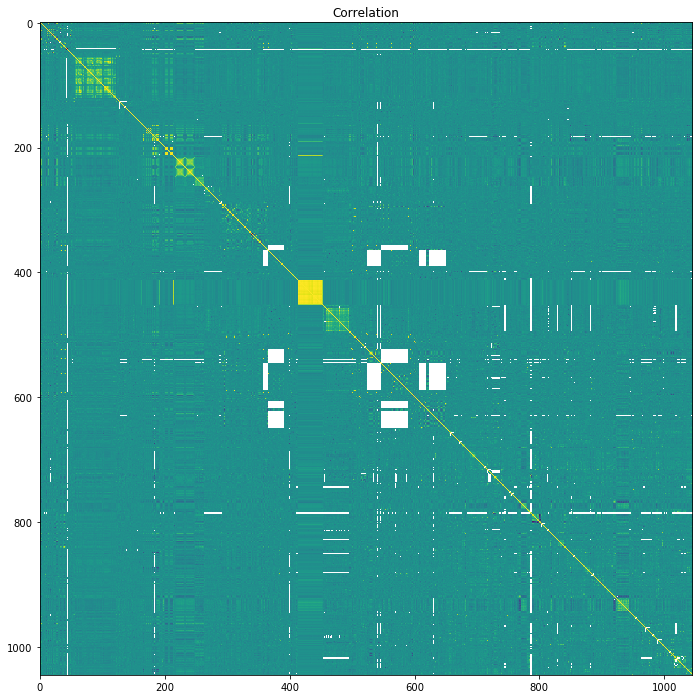

In [17]:
plt.figure(figsize=(16, 12))
plt.imshow(cor)
plt.title('Correlation')

## Filter for high correlations

In [21]:
cor_filtered = cor[((cor > 0.75) & (cor < 1)) | ((cor < -0.75) & (cor > -1))].dropna(axis=0, how='all').dropna(axis=1, how='all')
cor_filtered

,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXAGM,DMDEDUC2,SIAPROXY,SIAINTRP,FIAINTRP,AIALANGA,DMDHHSIZ,...,SMQ040,SMAQUEX2,SMQ856,SMAQUEX.x,SMQ681,SMDANY,SMAQUEX.y,SXD021,SXQ800,SXQ700
RIDAGEYR,NaN,NaN,NaN,0.998737,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RIDRETH1,NaN,NaN,0.966514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RIDRETH3,NaN,0.966514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RIDEXAGM,0.998737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.750096,NaN,NaN,NaN,NaN,NaN,NaN
DMDEDUC2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMDANY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.846812,NaN,NaN,NaN,0.948415,NaN,NaN,NaN,NaN,NaN
SMAQUEX.y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SXD021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.767382,0.852917
SXQ800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.767382,NaN,NaN


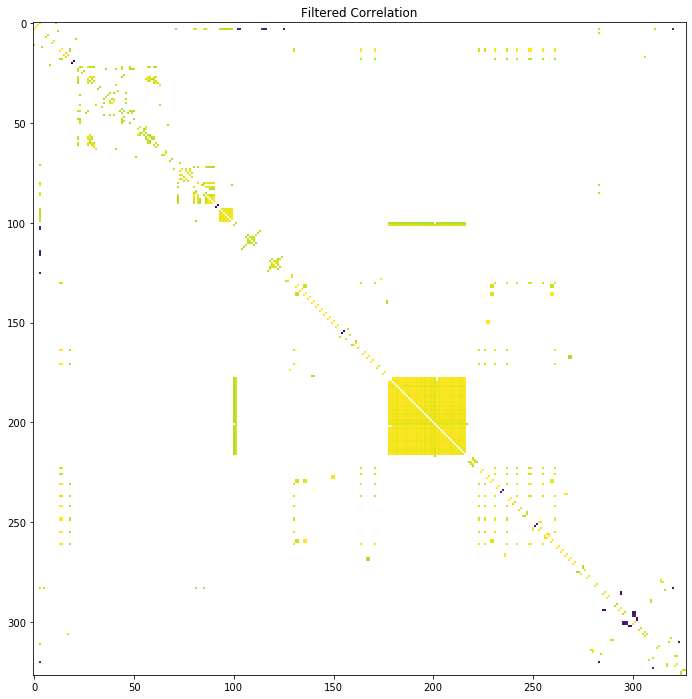

In [22]:
plt.figure(figsize=(16, 12))
plt.title('Filtered Correlation')
plt.imshow(cor_filtered)

## Fill NaNs

In [12]:
def fill_nans(df):
    for col in df.columns:
        df[col] = df[col].fillna(df[col].mean())
    return df
df = fill_nans(df)
df

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,...,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD110,WHD120,WHD130,WHD140,WHQ150
0,73557,1,69,4,4,1.0,1.000000,1,1.0,3.000000,...,180.000000,3.000000,3.00000,210.000000,1.633851,270.000000,200.000000,69.000000,270.000000,62.000000
1,73557,1,69,4,4,1.0,1.000000,1,1.0,3.000000,...,180.000000,3.000000,3.00000,210.000000,1.633851,270.000000,200.000000,69.000000,270.000000,62.000000
2,73558,1,54,3,3,1.0,2.000000,1,1.0,3.000000,...,200.000000,3.000000,3.00000,160.000000,2.000000,240.000000,250.000000,72.000000,250.000000,25.000000
3,73558,1,54,3,3,1.0,2.000000,1,1.0,3.000000,...,200.000000,3.000000,3.00000,160.000000,2.000000,240.000000,250.000000,72.000000,250.000000,25.000000
4,73558,1,54,3,3,1.0,2.000000,1,1.0,3.000000,...,200.000000,3.000000,3.00000,160.000000,2.000000,240.000000,250.000000,72.000000,250.000000,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19575,83727,1,26,2,2,2.0,2.000000,1,1.0,5.000000,...,150.000000,3.000000,3.00000,150.000000,2.000000,400.575246,572.003108,331.933048,150.000000,26.000000
19576,83728,2,2,1,1,2.0,1.868871,1,1.0,3.424005,...,247.110946,1.796441,2.22103,336.489335,1.633851,400.575246,572.003108,331.933048,332.331636,791.196378
19577,83729,2,42,4,4,2.0,2.000000,2,1.0,5.000000,...,195.000000,1.000000,2.00000,185.000000,1.000000,155.000000,135.000000,331.933048,195.000000,42.000000
19578,83730,1,7,2,2,1.0,1.868871,1,1.0,3.424005,...,247.110946,1.796441,2.22103,336.489335,1.633851,400.575246,572.003108,331.933048,332.331636,791.196378


## PCA

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
def apply_pca(df, components=-1):
    pca = None

    ss = StandardScaler()
    df_norm = ss.fit_transform(df)

    pca = PCA()
    pca.fit(df_norm)

    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

    plt.figure(figsize=(16, 12))
    plt.bar(x=list(range(df_norm.shape[1])), height=pca.explained_variance_ratio_, color='black')
    plt.xlabel('Components', fontsize=12)
    # plt.ylim(0, 0.06)
    # plt.xlim(0, 100)
    plt.ylabel('Variance%', fontsize=12)
    plt.title('Variance of Components',fontsize=15)
    plt.show()

    print("Precision:", pca.get_precision())
    print("Explained Variance:", np.sum(pca.explained_variance_ratio_))
    return pca

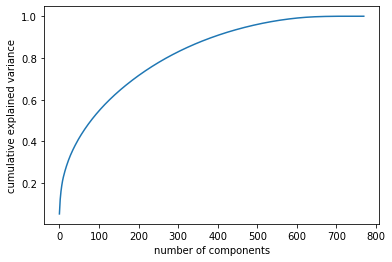

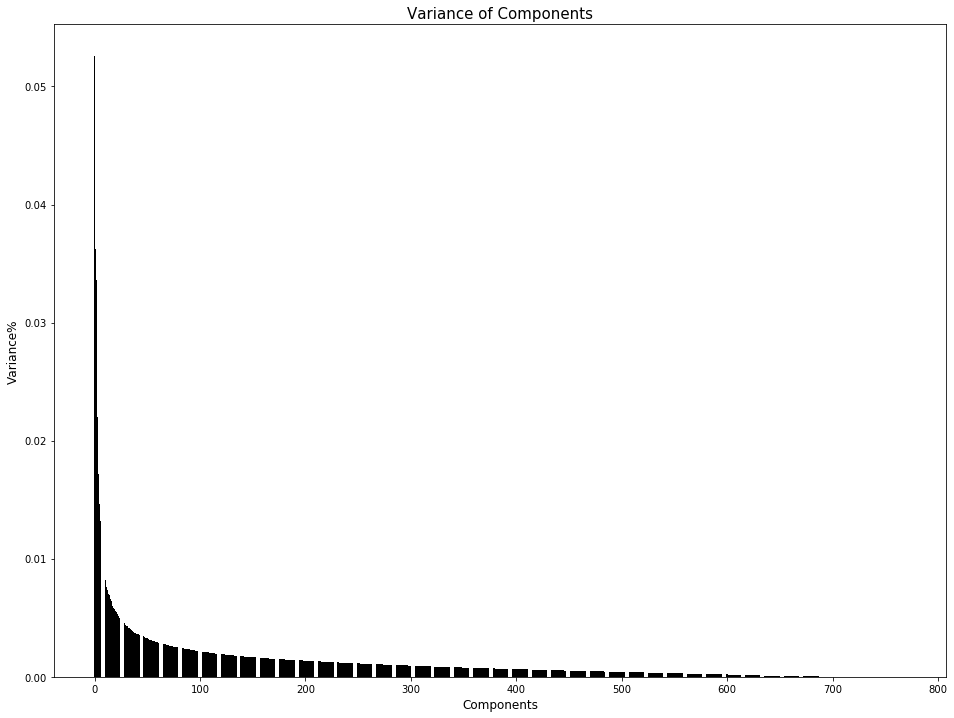

Precision: [[ 1.21997732e+00  2.73123369e-02 -2.26449905e-02 ...  2.98274568e-02
  -5.92290907e-03 -2.03919933e-02]
 [ 2.73123369e-02  3.16705291e+00  6.01040966e-02 ...  2.60792907e-02
  -2.30446143e-02 -1.83375244e-02]
 [-2.26449925e-02  6.01040948e-02  2.31630699e+01 ... -2.17135463e-01
  -1.88422052e-01 -1.55463821e-01]
 ...
 [ 2.98274571e-02  2.60792910e-02 -2.17135466e-01 ...  2.21338189e+00
  -2.40365833e-01 -2.51837108e-02]
 [-5.92290949e-03 -2.30446148e-02 -1.88422048e-01 ... -2.40365833e-01
   2.16339841e+00  7.47599645e-02]
 [-2.03919934e-02 -1.83375247e-02 -1.55463819e-01 ... -2.51837109e-02
   7.47599645e-02  1.45678489e+00]]


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
apply_pca(df)

In [ ]:
apply_pca(df)

In [38]:
pca = PCA(n_components=200)
pca.fit(df_norm)
pca.explained_variance_

array([40.52055095, 27.88523473, 25.8827511 , 16.91786707, 13.20207162,
       11.24604808, 10.18227402,  9.1002112 ,  8.19171109,  7.21506132,
        6.3141279 ,  5.87009372,  5.63465311,  5.3897749 ,  5.31117498,
        5.06077131,  4.95152451,  4.60652633,  4.49473747,  4.39799551,
        4.28285065,  4.24281762,  4.11841905,  3.99011244,  3.8559141 ,
        3.74060811,  3.68836923,  3.59888288,  3.49741861,  3.39977597,
        3.319894  ,  3.28334247,  3.21176748,  3.15111058,  3.11554217,
        3.07490968,  2.97890941,  2.94972598,  2.88527945,  2.86473421,
        2.81719047,  2.78458606,  2.76552132,  2.71613028,  2.6986634 ,
        2.67932227,  2.64316172,  2.60443432,  2.55443732,  2.53406236,
        2.50092052,  2.44574472,  2.43005371,  2.42160904,  2.36687888,
        2.34835081,  2.32995317,  2.32200166,  2.29774987,  2.25124569,
        2.24835517,  2.22435872,  2.20134431,  2.19131406,  2.17766349,
        2.14869062,  2.12612702,  2.11751711,  2.09451802,  2.07

In [39]:
pca.explained_variance_ratio_

array([0.0526214 , 0.03621274, 0.03361225, 0.02197013, 0.01714467,
       0.01460451, 0.01322306, 0.01181785, 0.01063804, 0.00936973,
       0.00819975, 0.00762311, 0.00731736, 0.00699935, 0.00689728,
       0.00657209, 0.00643022, 0.0059822 , 0.00583702, 0.00571139,
       0.00556186, 0.00550987, 0.00534832, 0.0051817 , 0.00500742,
       0.00485768, 0.00478985, 0.00467364, 0.00454187, 0.00441507,
       0.00431133, 0.00426386, 0.00417091, 0.00409214, 0.00404595,
       0.00399319, 0.00386852, 0.00383062, 0.00374692, 0.00372024,
       0.0036585 , 0.00361616, 0.0035914 , 0.00352726, 0.00350458,
       0.00347946, 0.0034325 , 0.00338221, 0.00331728, 0.00329082,
       0.00324778, 0.00317613, 0.00315575, 0.00314479, 0.00307371,
       0.00304965, 0.00302576, 0.00301543, 0.00298394, 0.00292355,
       0.00291979, 0.00288863, 0.00285874, 0.00284572, 0.00282799,
       0.00279036, 0.00276106, 0.00274988, 0.00272001, 0.00269514,
       0.00266843, 0.00262898, 0.00262436, 0.00261001, 0.00257

In [40]:
pca.explained_variance_ratio_.sum()

0.709318203079673

Text(0, 0.5, 'cumulative explained variance')

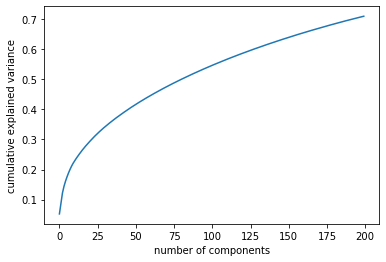

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [42]:
pca.explained_variance_ratio_.sum()

0.709318203079673

## Single file PCA

Columns before: (10175, 47)

Columns after: (10175, 46)


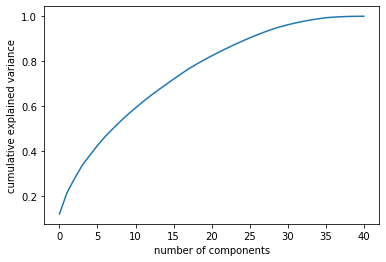

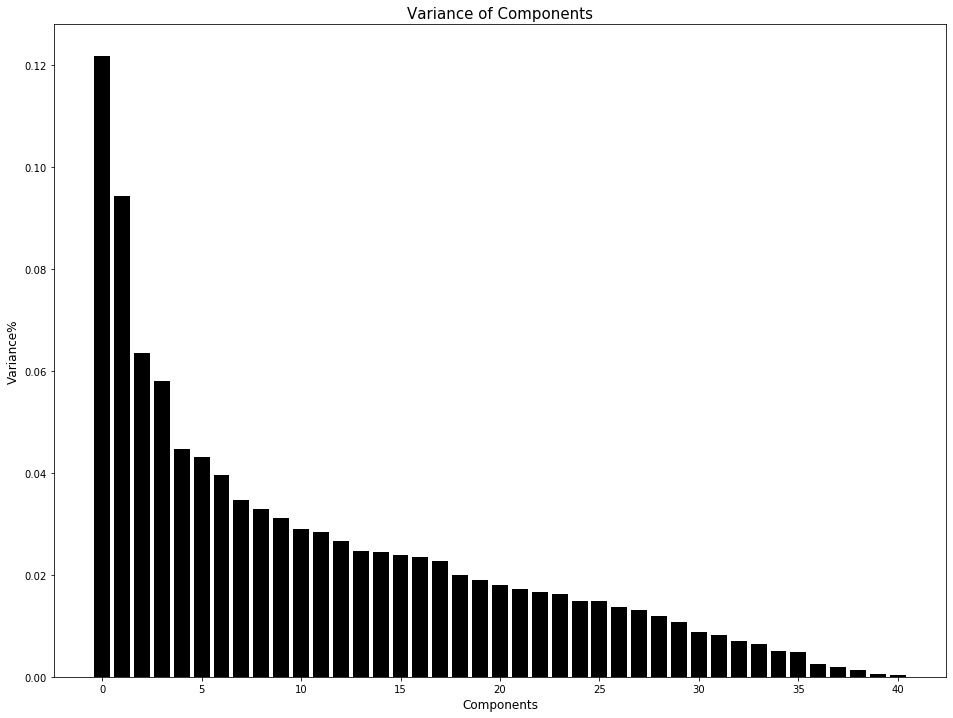

Precision: [[ 1.00259193e+00 -1.42206514e-02  3.46303914e-03 ...  3.92286572e-03
  -1.42810115e-02 -1.19490031e-02]
 [-1.42206514e-02  2.36676208e+00  1.60224212e-02 ...  7.87438947e-02
  -3.93792117e-02 -8.22836701e-03]
 [ 3.46303914e-03  1.60224212e-02  1.09614408e+00 ... -1.40925769e-02
   3.52768893e-02  1.63377529e-02]
 ...
 [ 3.92286572e-03  7.87438947e-02 -1.40925769e-02 ...  7.79249121e+00
  -7.26436183e+00  2.80813599e-02]
 [-1.42810115e-02 -3.93792117e-02  3.52768893e-02 ... -7.26436183e+00
   7.92840135e+00 -4.04534365e-01]
 [-1.19490031e-02 -8.22836701e-03  1.63377529e-02 ...  2.80813599e-02
  -4.04534365e-01  1.75930754e+00]]
Explained Variance: 1.0


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
df_ = pd.read_csv(file_paths[0], encoding="ISO-8859-1")
df_ = clean_same_value_columns(df_)
df_ = clean_nulls(df_, percent=0.7)
df_ = fill_nans(df_)
apply_pca(df_)

Columns before: (9813, 168)

Columns after: (9813, 154)


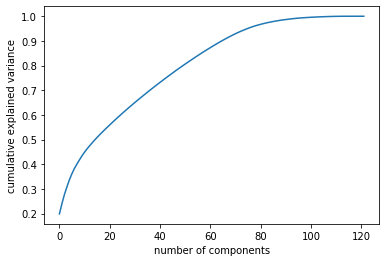

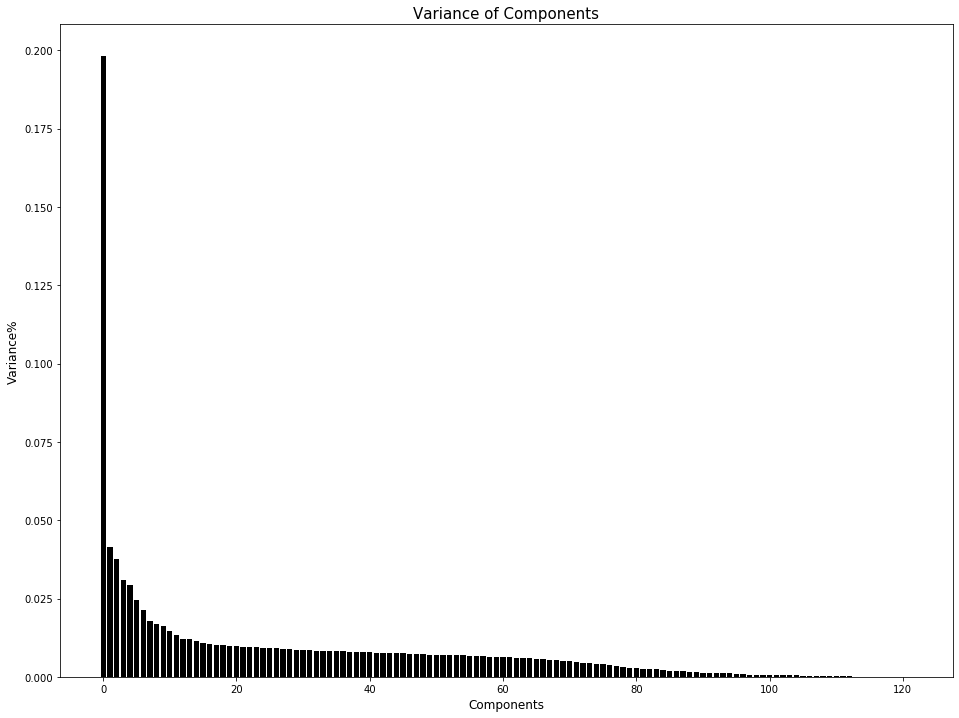

Precision: [[ 1.01190748e+00 -2.18407381e-03  8.91654443e-03 ...  5.36591136e-03
  -2.83069148e-04  8.10405956e-03]
 [-2.18407381e-03  2.70958055e+00 -1.74921755e+00 ...  4.26760167e-02
  -3.94316760e-02 -4.25902601e-02]
 [ 8.91654443e-03 -1.74921755e+00  2.34613825e+00 ...  1.65063177e-02
  -6.46446460e-03 -7.31017656e-03]
 ...
 [ 5.36591136e-03  4.26760167e-02  1.65063177e-02 ...  1.04739131e+00
   1.77661826e-02  2.47773043e-03]
 [-2.83069148e-04 -3.94316760e-02 -6.46446460e-03 ...  1.77661826e-02
   1.18401438e+00  1.91491184e-01]
 [ 8.10405956e-03 -4.25902601e-02 -7.31017656e-03 ...  2.47773043e-03
   1.91491184e-01  1.11745592e+00]]
Explained Variance: 1.0000000000000002


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
df_ = pd.read_csv(file_paths[1], encoding="ISO-8859-1")
df_ = clean_same_value_columns(df_)
df_ = clean_nulls(df_, percent=0.7)
df_ = fill_nans(df_)
apply_pca(df_)

Columns before: (9813, 224)

Columns after: (9813, 185)


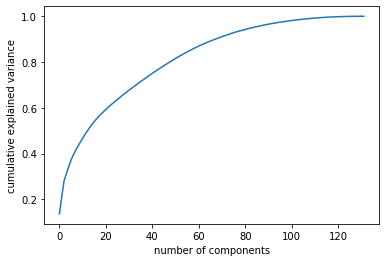

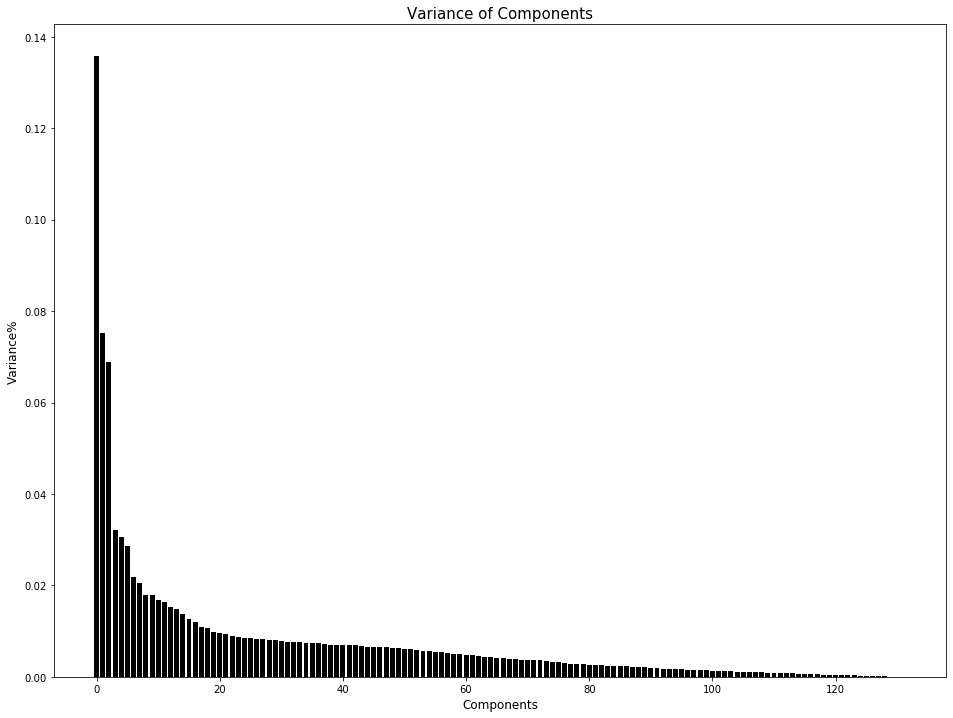

Precision: [[ 1.01237616e+00  1.14954615e-02 -2.29609859e-02 ...  7.74467171e-03
   4.64352461e-05 -7.25733182e-03]
 [ 1.14954615e-02  1.13510032e+00  7.11000806e-02 ...  7.98498825e-03
   7.23389258e-04  2.20007266e-02]
 [-2.29609859e-02  7.11000806e-02  2.82533937e+00 ...  1.96940187e-02
  -2.20823002e-02  1.08839405e-01]
 ...
 [ 7.74467171e-03  7.98498825e-03  1.96940187e-02 ...  1.04226357e+00
   1.28455280e-02  4.25232504e-02]
 [ 4.64352461e-05  7.23389258e-04 -2.20823002e-02 ...  1.28455280e-02
   1.12472441e+00  1.27580342e-01]
 [-7.25733182e-03  2.20007266e-02  1.08839405e-01 ...  4.25232504e-02
   1.27580342e-01  1.22275102e+00]]
Explained Variance: 0.9999999999999999


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
df_ = pd.read_csv(file_paths[2], encoding="ISO-8859-1")
df_ = clean_same_value_columns(df_)
df_ = clean_nulls(df_, percent=0.7)
df_ = fill_nans(df_)
apply_pca(df_)

Columns before: (9813, 424)

Columns after: (9813, 418)


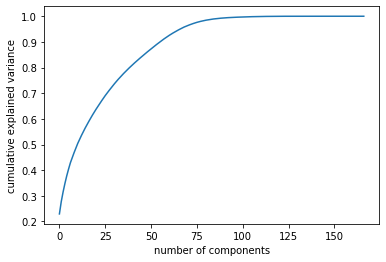

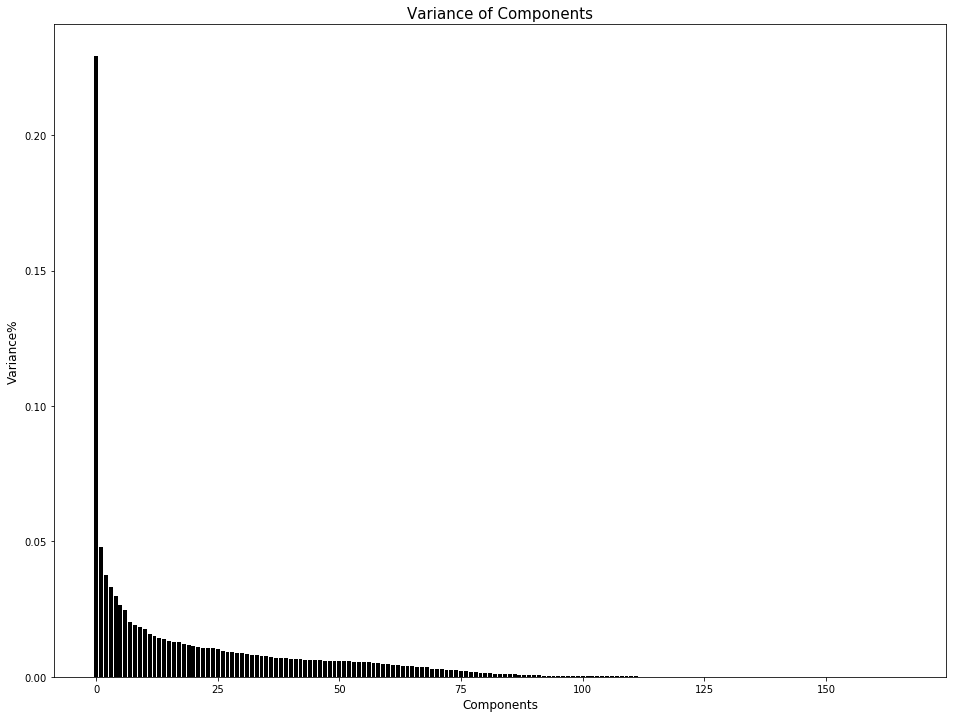

Precision: [[ 1.01668033e+00 -8.58636119e+03  8.58638715e+03 ...  6.27098691e-03
  -3.38873683e+02  3.38865014e+02]
 [-1.37186250e+04 -6.31224273e+16  6.31224273e+16 ... -2.06381250e+04
   8.34817333e+08 -8.34816720e+08]
 [ 1.49440000e+04  6.60591621e+16 -6.60591621e+16 ...  2.21987500e+04
  -5.33355518e+08  5.33354922e+08]
 ...
 [ 6.27098765e-03 -8.22590653e+03  8.22587647e+03 ...  1.48226756e+00
  -3.32665044e+02  3.32655602e+02]
 [-3.38873821e+02  1.14145062e+07 -1.14142312e+07 ... -3.32665201e+02
   3.71029956e+08 -3.71029926e+08]
 [ 3.38865151e+02 -1.14136689e+07  1.14133939e+07 ...  3.32655759e+02
  -3.71029926e+08  3.71029896e+08]]
Explained Variance: 1.0


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
df_ = pd.read_csv(file_paths[3], encoding="ISO-8859-1")
df_ = clean_same_value_columns(df_)
df_ = clean_nulls(df_, percent=0.7)
df_ = fill_nans(df_)
apply_pca(df_)

Columns before: (20194, 13)

Columns after: (20194, 5)


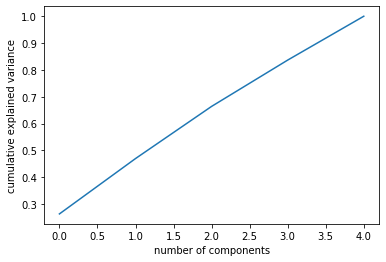

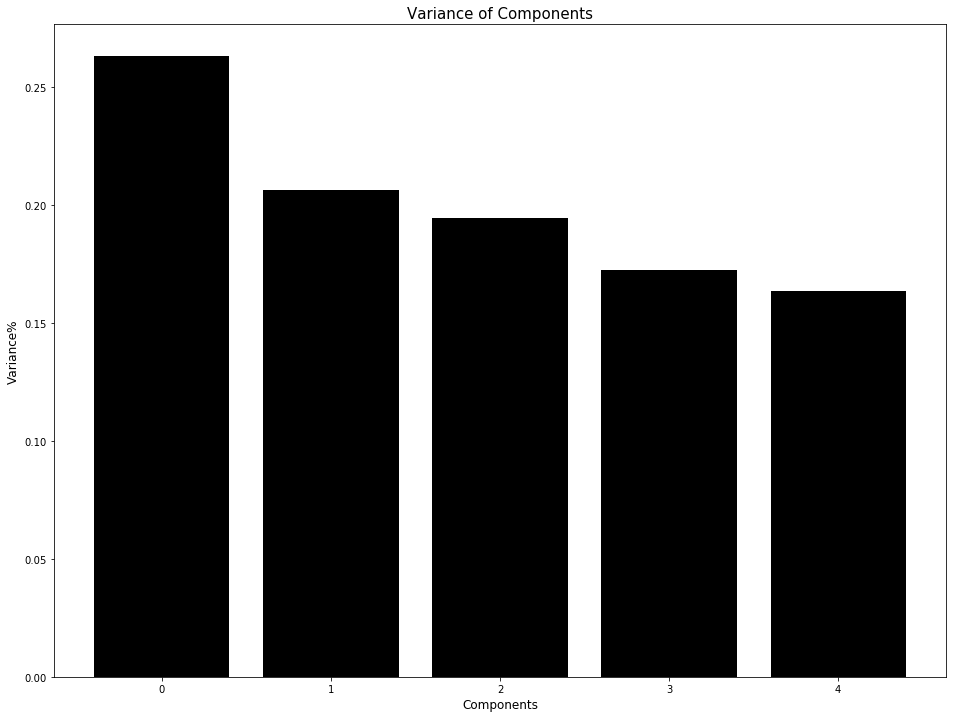

Precision: [[ 1.00553281e+00 -3.17549446e-02  3.12869935e-02 -1.29552798e-02
   5.76058993e-02]
 [-3.17549446e-02  1.00095331e+00 -9.88050052e-04  4.09130551e-04
  -1.81920682e-03]
 [ 3.12869935e-02 -9.88050052e-04  1.04751168e+00 -1.69044863e-01
  -1.18573518e-01]
 [-1.29552798e-02  4.09130551e-04 -1.69044863e-01  1.04833229e+00
  -1.27910675e-01]
 [ 5.76058993e-02 -1.81920682e-03 -1.18573518e-01 -1.27910675e-01
   1.03813390e+00]]
Explained Variance: 1.0


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
df_ = pd.read_csv(file_paths[4], encoding="ISO-8859-1")
df_ = clean_same_value_columns(df_)
df_ = clean_nulls(df_, percent=1)
df_ = fill_nans(df_)
apply_pca(df_)

Columns before: (10175, 953)

Columns after: (10175, 777)


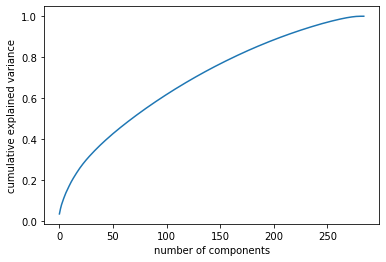

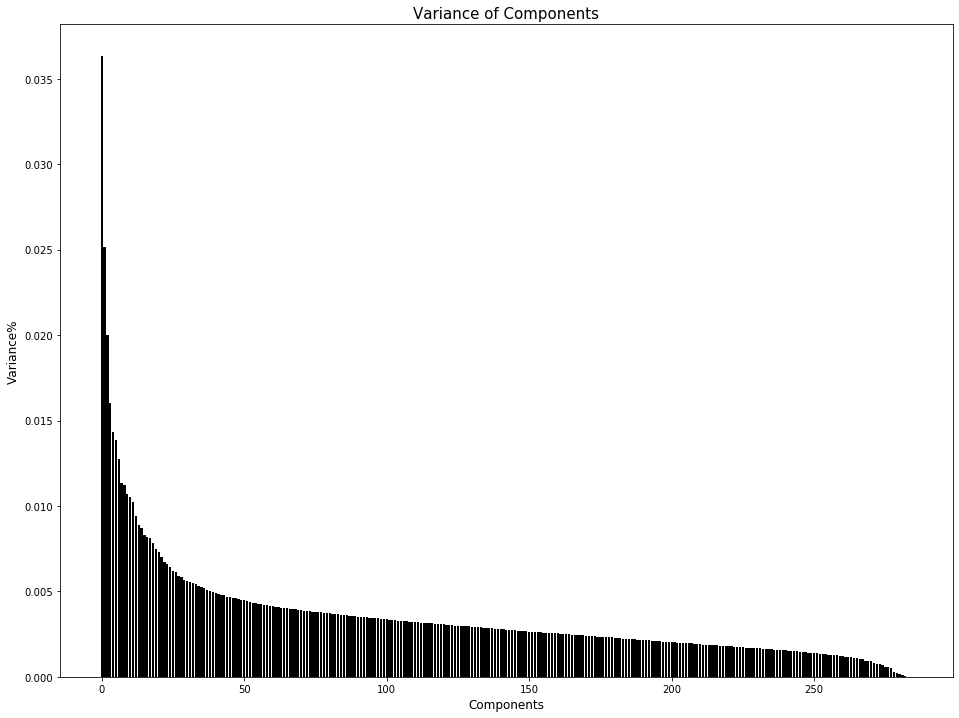

Precision: [[ 1.02595563e+00  1.77966382e-02  6.55649578e-03 ...  7.53840298e-03
  -1.72336710e-03  6.74744954e-03]
 [ 1.77966382e-02  1.27429390e+00  5.50954668e-02 ... -3.28768913e-02
  -1.07655681e-02 -4.34631090e-02]
 [ 6.55649578e-03  5.50954668e-02  1.20896109e+00 ... -3.17085410e-02
  -2.49882459e-04  1.58325659e-02]
 ...
 [ 7.53840298e-03 -3.28768913e-02 -3.17085410e-02 ...  1.52559450e+00
  -1.11692336e-01 -4.10530477e-02]
 [-1.72336710e-03 -1.07655681e-02 -2.49882459e-04 ... -1.11692336e-01
   1.68090071e+00  2.75559631e-02]
 [ 6.74744954e-03 -4.34631090e-02  1.58325659e-02 ... -4.10530477e-02
   2.75559631e-02  1.07007977e+00]]
Explained Variance: 1.0000000000000002


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
df_ = pd.read_csv(file_paths[5], encoding="ISO-8859-1")
df_ = clean_same_value_columns(df_)
df_ = clean_nulls(df_, percent=0.7)
df_ = fill_nans(df_)
apply_pca(df_)